In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
trainSet = pd.read_csv(r'train.csv')
testSet = pd.read_csv(r'test.csv')
trainSet.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

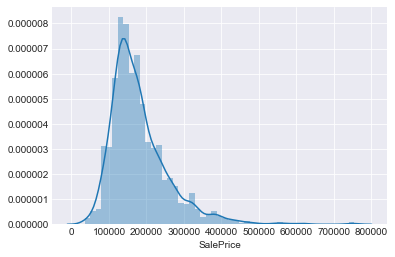

In [3]:
sns.distplot(trainSet['SalePrice'])

Text(0,0.5,'SalePrice')

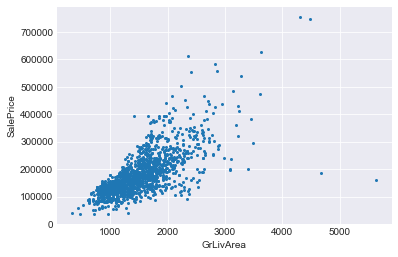

In [4]:
temp = trainSet[['GrLivArea','SalePrice']]
plt.scatter(temp['GrLivArea'],temp['SalePrice'],s=4)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
#sns.lmplot(data=trainSet,x=trainSet['GrLivArea'],y=trainSet['SalePrice'],fit_reg=False)

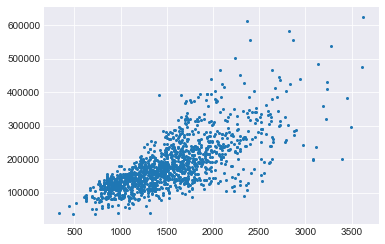

In [5]:
trainSet = trainSet[trainSet['GrLivArea']<=4000]
plt.scatter(trainSet['GrLivArea'],trainSet['SalePrice'],s=4)

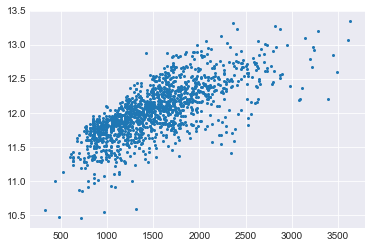

In [6]:
trainSet['SalePrice'] = np.log1p(trainSet['SalePrice'])
plt.scatter(trainSet['GrLivArea'],trainSet['SalePrice'],s=4)

In [7]:
trainSet.skew()

Id                0.001342
MSSubClass        1.406366
LotFrontage       1.536435
LotArea          12.587561
OverallQual       0.183871
OverallCond       0.690631
YearBuilt        -0.610087
YearRemodAdd     -0.499831
MasVnrArea        2.648987
BsmtFinSF1        0.744855
BsmtFinSF2        4.248587
BsmtUnfSF         0.921759
TotalBsmtSF       0.486395
1stFlrSF          0.867081
2ndFlrSF          0.777866
LowQualFinSF      8.998564
GrLivArea         0.835192
BsmtFullBath      0.591152
BsmtHalfBath      4.128967
FullBath          0.017694
HalfBath          0.684223
BedroomAbvGr      0.215067
KitchenAbvGr      4.481366
TotRmsAbvGrd      0.661416
Fireplaces        0.632678
GarageYrBlt      -0.645821
GarageCars       -0.343475
GarageArea        0.132991
WoodDeckSF        1.551271
OpenPorchSF       2.339846
EnclosedPorch     3.084454
3SsnPorch        10.289866
ScreenPorch       4.115641
PoolArea         17.522613
MiscVal          24.443364
MoSold            0.217883
YrSold            0.093214
S

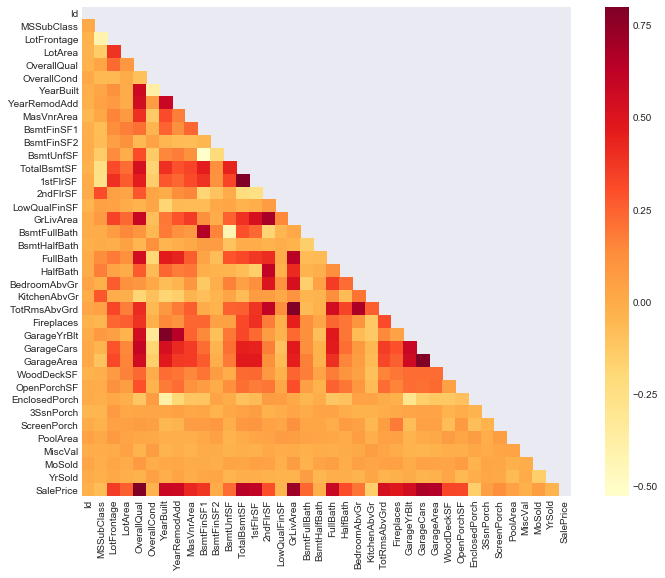

In [8]:
fig,axis = plt.subplots(figsize=(12,9))
corr = trainSet.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,cmap='YlOrRd',ax=axis,mask=mask,square=True,vmax=0.8)

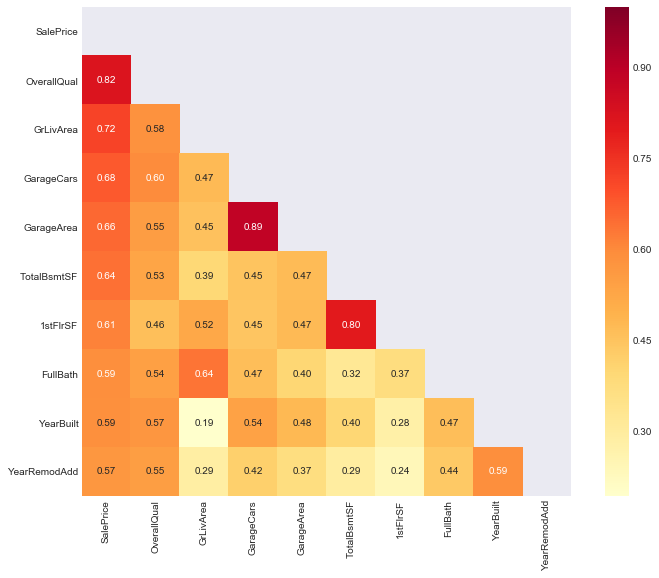

In [9]:
f,axis = plt.subplots(figsize=(12,9))
k=10
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(trainSet[cols].values.T)
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(cm,cmap='YlOrRd',mask=mask,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},
                     yticklabels=cols.values,xticklabels=cols.values)

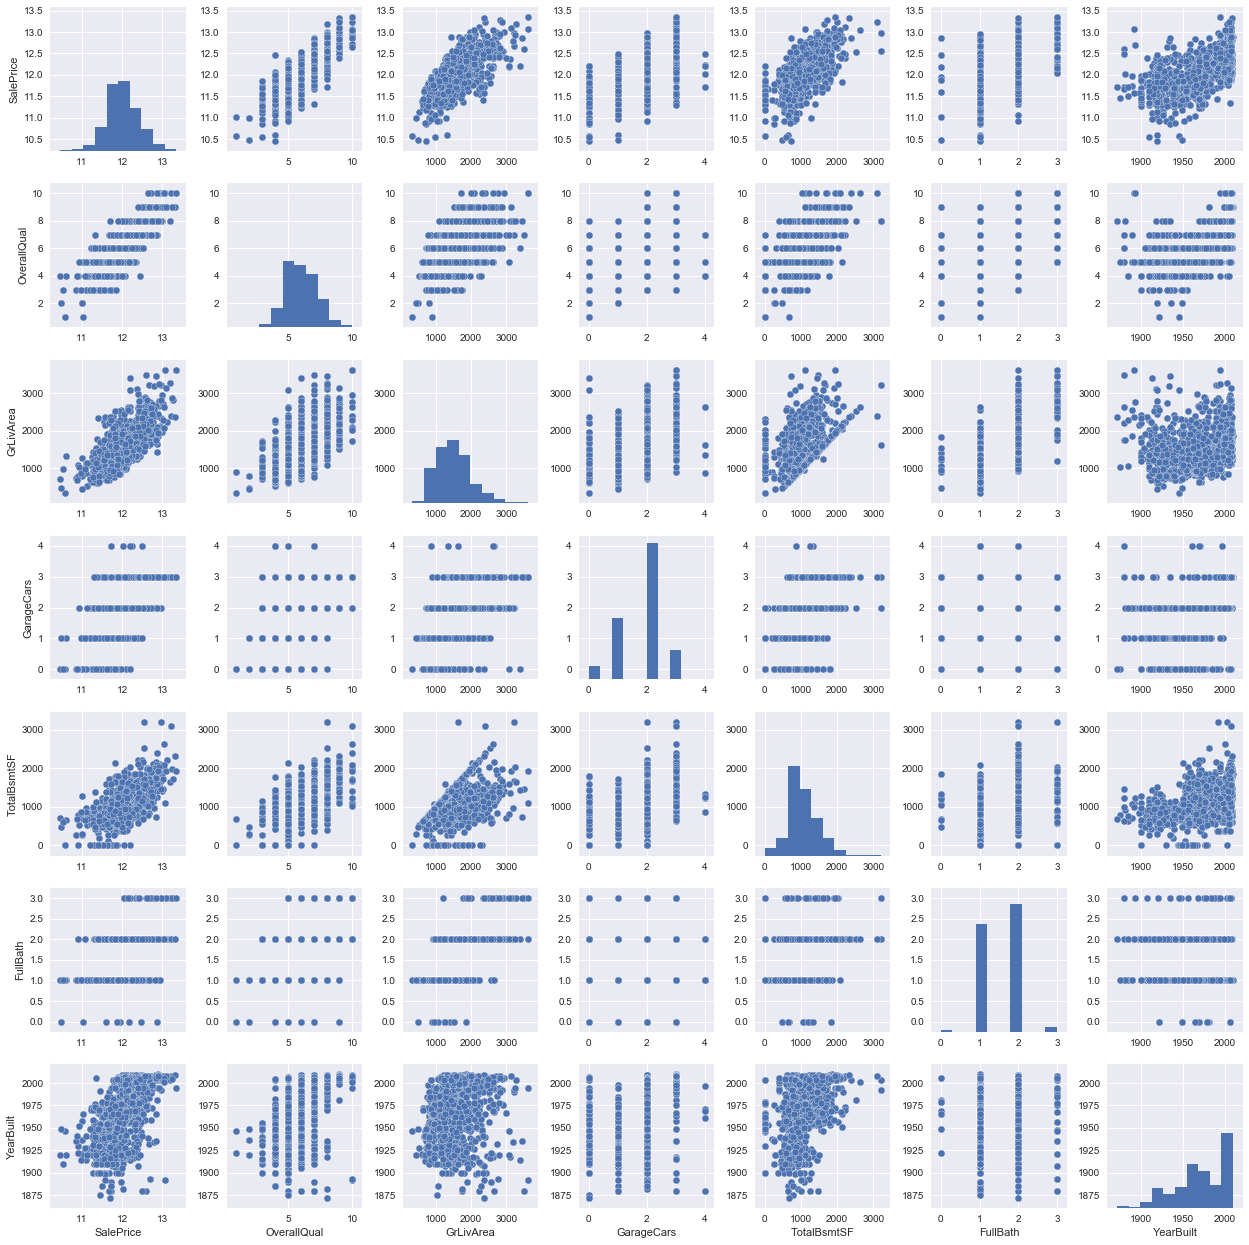

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(trainSet[cols], size = 2.5)

In [11]:
missing = trainSet.isnull().sum().sort_values(ascending=False)
percentage = (trainSet.isnull().sum()/trainSet.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing,percentage],axis=1,keys=['Nbr of missing values','Percent'])
missing_data.head(20)

Nbr of missing values   Percent
PoolQC                         1451  0.996566
MiscFeature                    1402  0.962912
Alley                          1365  0.937500
Fence                          1176  0.807692
FireplaceQu                     690  0.473901
LotFrontage                     259  0.177885
GarageCond                       81  0.055632
GarageType                       81  0.055632
GarageYrBlt                      81  0.055632
GarageFinish                     81  0.055632
GarageQual                       81  0.055632
BsmtExposure                     38  0.026099
BsmtFinType2                     38  0.026099
BsmtFinType1                     37  0.025412
BsmtCond                         37  0.025412
BsmtQual                         37  0.025412
MasVnrArea                        8  0.005495
MasVnrType                        8  0.005495
Electrical                        1  0.000687
Utilities                         0  0.000000

In [12]:
droplist = missing_data.loc[missing_data['Percent']>=0.15].index
len(droplist)

6

In [13]:
train_d = trainSet.copy()
train_d = train_d.drop(droplist,axis=1)
print(trainSet.shape[1],train_d.shape[1])

81 75


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaled_price = StandardScaler().fit_transform(train_d['SalePrice'][:,np.newaxis])
low_range = scaled_price[scaled_price[:,0].argsort()][:10]
high_range = scaled_price[scaled_price[:,0].argsort()][-10:]
print(low_range)
print('\n-----------------------------------\n')
print(high_range)

[[-3.94421875]
 [-3.91465031]
 [-3.73595042]
 [-3.64433968]
 [-3.59975102]
 [-2.93713119]
 [-2.91296279]
 [-2.79547274]
 [-2.79547274]
 [-2.75028125]]

-----------------------------------

[[ 2.60408846]
 [ 2.64969307]
 [ 2.70231211]
 [ 2.78850269]
 [ 2.96424358]
 [ 3.04281458]
 [ 3.04999897]
 [ 3.16683314]
 [ 3.28831413]
 [ 3.34281704]]


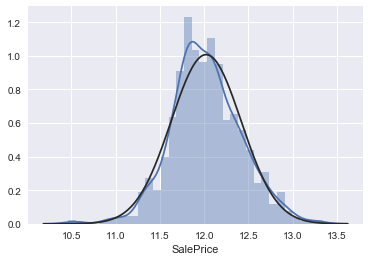

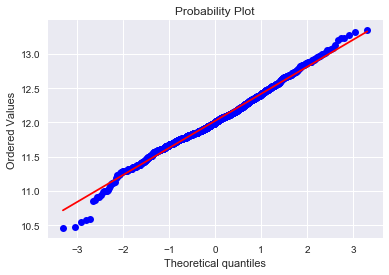

In [16]:
from scipy.stats import norm
from scipy import stats

sns.distplot(train_d['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_d['SalePrice'],plot=plt)

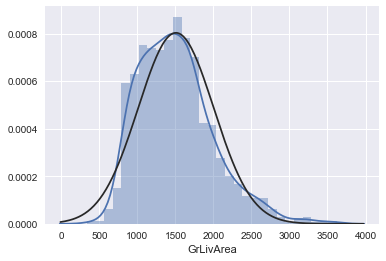

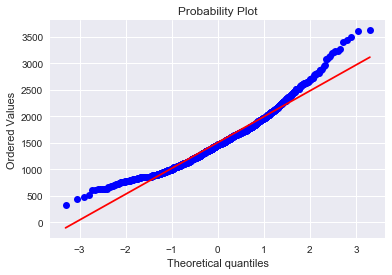

In [17]:
sns.distplot(train_d['GrLivArea'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_d['GrLivArea'],plot=plt)

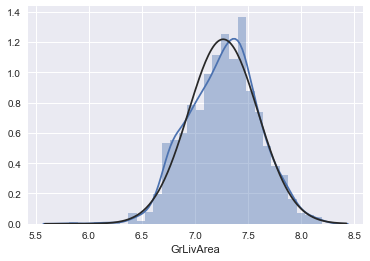

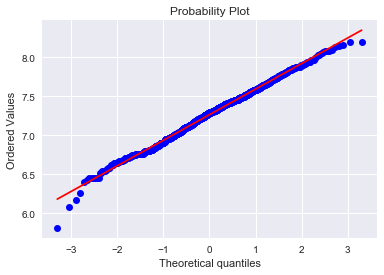

In [18]:
train_d['GrLivArea'] = np.log1p(train_d['GrLivArea'])
sns.distplot(train_d['GrLivArea'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_d['GrLivArea'],plot=plt)

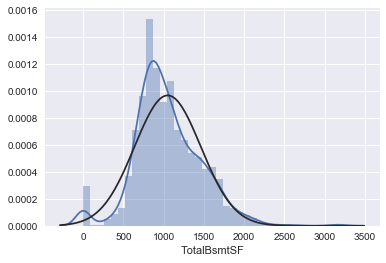

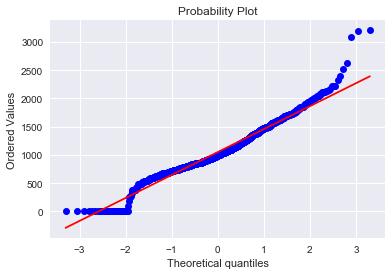

In [19]:
sns.distplot(train_d['TotalBsmtSF'],fit=norm)
fig = plt.figure()
res = stats.probplot(train_d['TotalBsmtSF'],plot=plt)

In [20]:
train_d['HasBsmt'] = np.zeros(len(train_d['TotalBsmtSF']))

In [21]:
train_d.loc[train_d['TotalBsmtSF']>0,'HasBsmt']=1
train_d['HasBsmt'].describe()

count    1456.000000
mean        0.974588
std         0.157427
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HasBsmt, dtype: float64

In [22]:
train_d.loc[train_d['HasBsmt']==1,'TotalBsmtSF'] = np.log1p(train_d['TotalBsmtSF'])

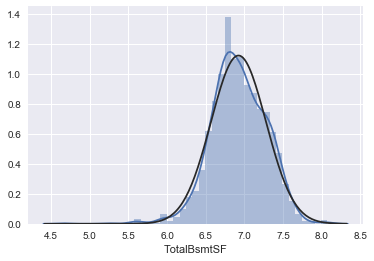

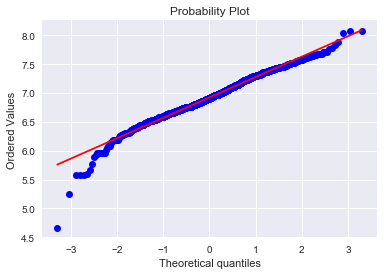

In [23]:
sns.distplot(train_d[train_d['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)
fig = plt.figure()
res = stats.probplot(train_d[train_d['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

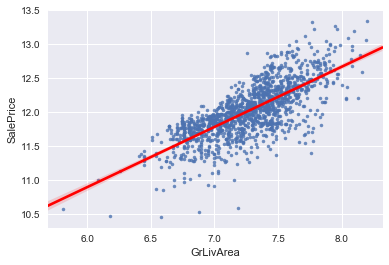

In [24]:
sns.regplot(train_d['GrLivArea'],train_d['SalePrice'],marker='.',line_kws = {'color':'r'})

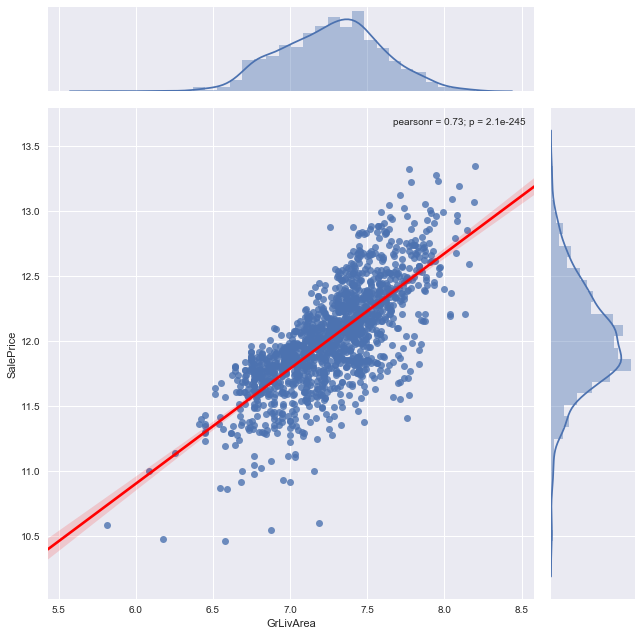

In [25]:
sns.jointplot(train_d['GrLivArea'],train_d['SalePrice'],kind='reg',size=9,joint_kws={'line_kws':{'color':'red'}})

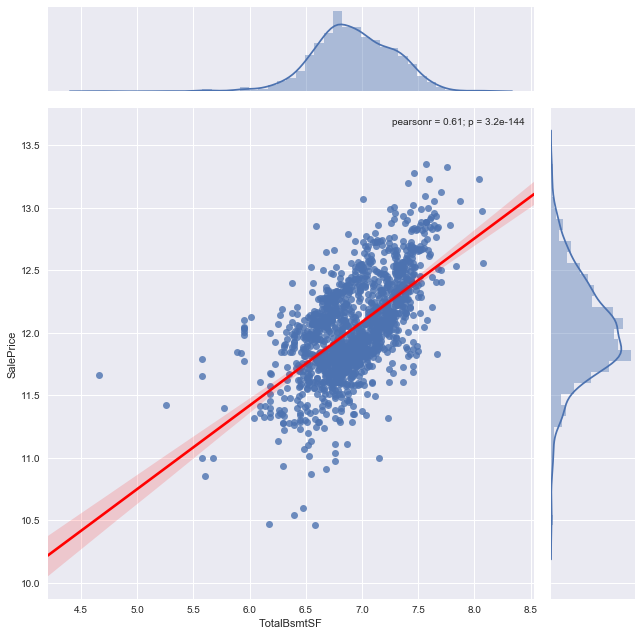

In [26]:
sns.jointplot(train_d[train_d['TotalBsmtSF']>0]['TotalBsmtSF'],
              train_d['SalePrice'],kind='reg',size=9,joint_kws={'line_kws':{'color':'red'}})

In [27]:
train_d = pd.get_dummies(train_d)

In [28]:
train_d.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=271)

In [29]:
trainSet['GrLivArea'].skew()

0.83519238865514467

In [30]:
trainNew = pd.read_csv(r'train.csv')

In [31]:
import statsmodels.api as sm
y = trainNew['SalePrice']
X = trainNew['GrLivArea']
model = sm.OLS(y,X)
results = model.fit()
bonf_test = results.outlier_test()['bonf(p)']
bonf_outlier = list(bonf_test[bonf_test<1e-3].index)
print(bonf_test[bonf_test<1e-3])

C:\Users\jeanl\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


523     6.897077e-08
898     4.290695e-06
1298    9.113612e-17
Name: bonf(p), dtype: float64


In [32]:
trainNew.iloc[bonf_outlier]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
898    899          20       RL        100.0    12919   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
523          Bnk    AllPub    ...            0    NaN   NaN         NaN   
898          Lvl    AllPub    ...            0    NaN   NaN         NaN   
1298         Bnk    AllPub    ...          480     Gd   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
523        0     10   2007       New        Partial     184750  
898        0      3   2010       New        Partial     611657  
1298       0      1   2008       New        Partial     160000  

[3 rows x 81 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

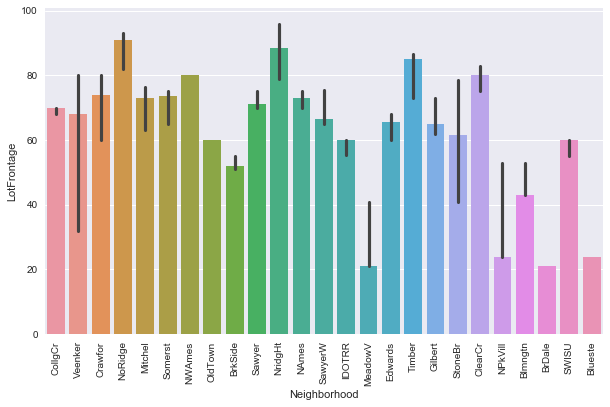

In [47]:
f,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=trainNew,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)

In [48]:
from xgboost.sklearn import XGBRegressor

In [49]:
set(trainNew['MSSubClass'])

{20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190}